In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import tensorflow as tf
from tensorflow import keras
import os
from PIL import Image
import cv2
import pathlib

# Downloading the Dataset and Storing it in a Directory

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(fname='flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified '.' which means the current directory named 'datasets'
# untar=true will unzip it

228813984/228813984 [==============================] - 2s 0us/step


In [3]:
type(data_dir), data_dir

(str, './datasets/flower_photos')

In [4]:
flower_dir = pathlib.Path(data_dir)
# When you convert data_dir to a pathlib.Path object,
# you gain the flexibility and power of the pathlib module to work with the file system
type(flower_dir), flower_dir

(pathlib.PosixPath, PosixPath('datasets/flower_photos'))

# File Paths of Images

In [5]:
flower_dir.glob('*/*.jpg')  # an object of paths of all images in each sub-dir

<generator object Path.glob at 0x7a34179e8350>

In [6]:
flower_paths = list(flower_dir.glob('*/*.jpg'))
# turns an object into a list containing paths
flower_paths[:5]

[PosixPath('datasets/flower_photos/tulips/3238068295_b2a7b17f48_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/8511683706_4173683d45_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/440714501_9f8268e1b0.jpg'),
 PosixPath('datasets/flower_photos/tulips/8681825637_837a63513a_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/16700863150_ddaa4d89b4_n.jpg')]

In [7]:
flower_paths = {
    'roses': list(flower_dir.glob('roses/*.jpg')),
    'daisy': list(flower_dir.glob('daisy/*.jpg')),
    'dandelion': list(flower_dir.glob('dandelion/*.jpg')),
    'sunflowers': list(flower_dir.glob('sunflowers/*.jpg')),
    'tulips': list(flower_dir.glob('tulips/*.jpg')),
}

In [8]:
for i in flower_paths.keys():
    print('{:<11}: {}'.format(i, len(flower_paths[i])))

roses      : 641
daisy      : 633
dandelion  : 898
sunflowers : 699
tulips     : 799


# Show Images

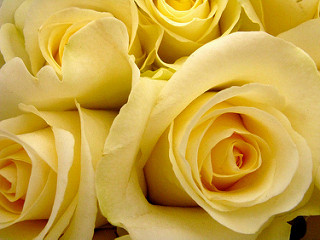

In [9]:
im = Image.open(str(flower_paths['roses'][2]))  # converts type from WindowsPath to str
im

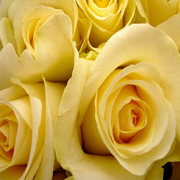

In [10]:
im.resize(size=(180, 180))

# Converting an Image into an Array

In [11]:
for i in flower_paths.keys():
    for j in range(2):
        print(cv2.imread(str(flower_paths[i][j])).shape)  # images have different shapes

(240, 240, 3)
(240, 320, 3)
(250, 320, 3)
(334, 500, 3)
(333, 500, 3)
(333, 500, 3)
(240, 240, 3)
(337, 500, 3)
(240, 320, 3)
(240, 240, 3)


In [12]:
labels = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [13]:
X = []  # contains arrays
Y = []  # contains types of flowers

for flower_type, paths in flower_paths.items():
    for path in paths:
        arr = cv2.imread(str(path))
        resized_arr = cv2.resize(arr, (180, 180))
        X.append(resized_arr)
        Y.append(labels[flower_type])

In [14]:
X = np.array(X)
Y = np.array(Y)
X.shape, Y.shape

((3670, 180, 180, 3), (3670,))

# Data Preprocessing

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42, stratify=Y)

In [16]:
X_train.shape, Y_train.shape

((3303, 180, 180, 3), (3303,))

In [17]:
X_test.shape, Y_test.shape

((367, 180, 180, 3), (367,))

In [18]:
values, counts = np.unique(Y_train, return_counts=True)
values, counts

(array([0, 1, 2, 3, 4]), array([577, 570, 808, 629, 719]))

In [19]:
X_train_scaled = X_train / 255
X_test_scaled = X_test /255

In [20]:
np.max(X_train), np.max(X_train_scaled)

(255, 1.0)

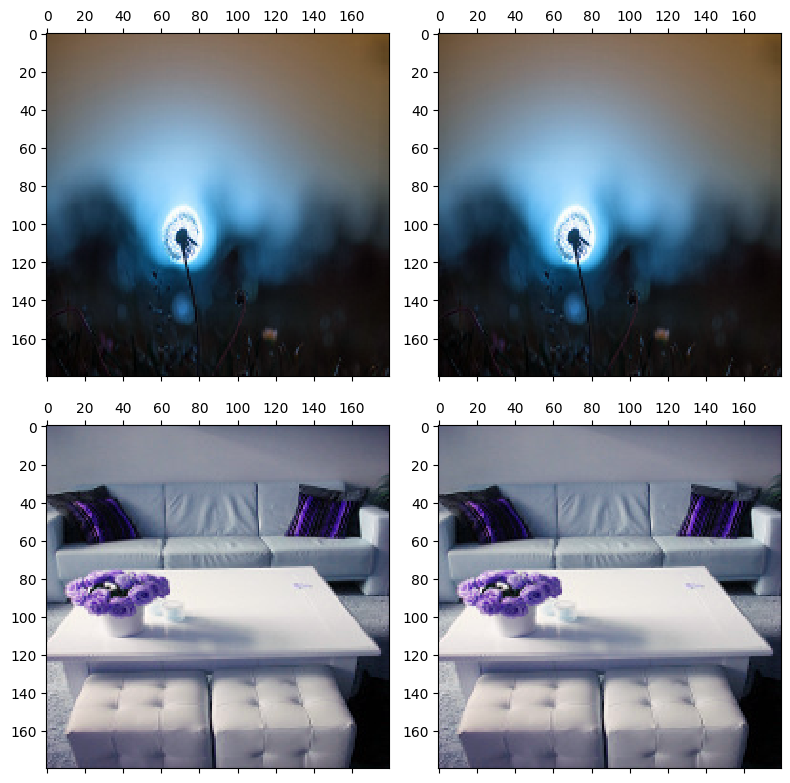

In [21]:
fig, subs = plt.subplots(ncols=2, nrows=2, figsize=(8,8))
sub1, sub2, sub3, sub4 = subs.flatten()

sub1.matshow(X_train[0])
sub2.matshow(X_train_scaled[0])
sub3.matshow(X_train[5])
sub4.matshow(X_train_scaled[5])

plt.tight_layout()

# Training without Data Augmentation

In [22]:
model = keras.Sequential([
    # CNN
    keras.layers.Input(shape=(180, 180, 3)),
    keras.layers.Conv2D(filters=18, kernel_size=(6, 6), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    keras.layers.Conv2D(filters=36, kernel_size=(6, 6), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    keras.layers.Conv2D(filters=72, kernel_size=(6, 6), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    # NN
    keras.layers.Flatten(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [23]:
model.fit(X_train_scaled, Y_train, epochs=20)

Epoch 1/20
104/104 [==============================] - 10s 26ms/step - loss: 1.3185 - accuracy: 0.4187
Epoch 2/20
104/104 [==============================] - 3s 25ms/step - loss: 1.0832 - accuracy: 0.5665
Epoch 3/20
104/104 [==============================] - 2s 24ms/step - loss: 0.9628 - accuracy: 0.6200
Epoch 4/20
104/104 [==============================] - 2s 23ms/step - loss: 0.8942 - accuracy: 0.6585
Epoch 5/20
104/104 [==============================] - 2s 23ms/step - loss: 0.8157 - accuracy: 0.6800
Epoch 6/20
104/104 [==============================] - 2s 23ms/step - loss: 0.7333 - accuracy: 0.7212
Epoch 7/20
104/104 [==============================] - 3s 25ms/step - loss: 0.6489 - accuracy: 0.7511
Epoch 8/20
104/104 [==============================] - 2s 24ms/step - loss: 0.5791 - accuracy: 0.7796
Epoch 9/20
104/104 [==============================] - 2s 23ms/step - loss: 0.4810 - accuracy: 0.8138
Epoch 10/20
104/104 [==============================] - 2s 24ms/step - loss: 0.4363 - accur

In [24]:
model.evaluate(X_test_scaled, Y_test)  # overfit lòi dza!!!

12/12 [==============================] - 1s 37ms/step - loss: 1.2458 - accuracy: 0.7548


[1.245802402496338, 0.7547683715820312]

In [25]:
proba_1 = model.predict(X_test_scaled)
Yp1_test = np.array([np.argmax(i) for i in proba_1])
Yp1_test.shape

12/12 [==============================] - 0s 16ms/step


(367,)

In [26]:
cr_1 = classification_report(Y_test, Yp1_test)

In [27]:
cm_1 = confusion_matrix(Y_test, Yp1_test)
display_cm1 = ConfusionMatrixDisplay(cm_1, display_labels=list(labels.keys()))

# Using Augmentation

### https://keras.io/api/layers/preprocessing_layers/

In [28]:
augmenter = keras.Sequential()
augmenter.add(keras.layers.RandomZoom(height_factor=(-0.2, 0.2), width_factor=(-0.2, 0.2)))
augmenter.add(keras.layers.RandomFlip(mode='horizontal'))
augmenter.add(keras.layers.RandomRotation(factor=(-0.2, 0.2)))
augmenter.add(keras.layers.RandomContrast(factor=(0.1, 0.4)))

In [29]:
augmented_tensor = augmenter(X_train_scaled)
augmented_tensor.shape

TensorShape([3303, 180, 180, 3])

In [30]:
augmented_arr = np.array(augmented_tensor[0])
augmented_arr.dtype

dtype('float32')

In [31]:
def clip_image(image):
    if image.dtype == np.float32 or image.dtype == np.float64:
        return np.clip(image, 0.0, 1.0)

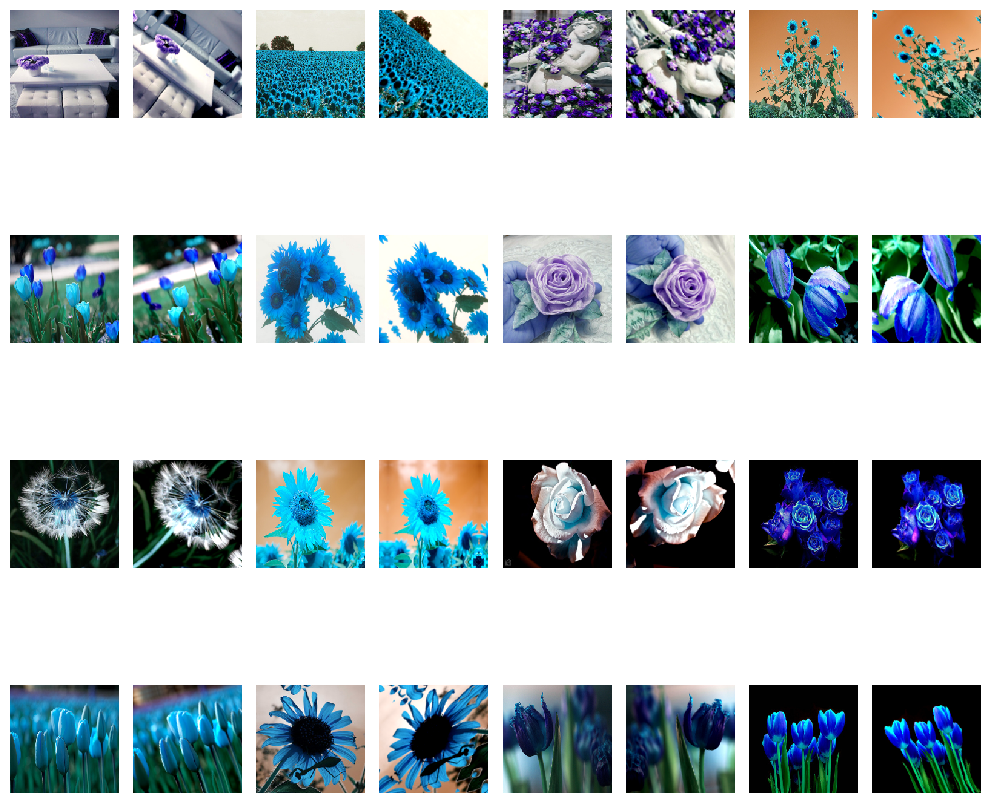

In [32]:
fig, subs = plt.subplots(ncols=8, nrows=4, figsize=(10, 10))

images = []
for i in range(16):
    images.append(X_train_scaled[i+5])
    images.append(augmented_tensor[i+5])

for ax, img in zip(subs.flatten(), images):
    ax.matshow(clip_image(img))
    ax.axis('off')

plt.tight_layout()

In [33]:
model2 = keras.Sequential([
    # Augment Data
    augmenter,
    # CNN
    keras.layers.Input(shape=(180, 180, 3)),
    keras.layers.Conv2D(filters=18, kernel_size=(6, 6), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    keras.layers.Conv2D(filters=36, kernel_size=(6, 6), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    keras.layers.Conv2D(filters=72, kernel_size=(6, 6), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(3, 3)),
    # NN
    keras.layers.Flatten(),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(5, activation='softmax')
])

model2.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [34]:
model2.fit(X_train_scaled, Y_train, epochs=20)

Epoch 1/20
104/104 [==============================] - 6s 29ms/step - loss: 1.3558 - accuracy: 0.3787
Epoch 2/20
104/104 [==============================] - 3s 28ms/step - loss: 1.0853 - accuracy: 0.5462
Epoch 3/20
104/104 [==============================] - 3s 26ms/step - loss: 0.9803 - accuracy: 0.6061
Epoch 4/20
104/104 [==============================] - 3s 26ms/step - loss: 0.9361 - accuracy: 0.6255
Epoch 5/20
104/104 [==============================] - 3s 26ms/step - loss: 0.8940 - accuracy: 0.6446
Epoch 6/20
104/104 [==============================] - 3s 29ms/step - loss: 0.8375 - accuracy: 0.6770
Epoch 7/20
104/104 [==============================] - 3s 27ms/step - loss: 0.8528 - accuracy: 0.6664
Epoch 8/20
104/104 [==============================] - 3s 26ms/step - loss: 0.8041 - accuracy: 0.6848
Epoch 9/20
104/104 [==============================] - 3s 26ms/step - loss: 0.7976 - accuracy: 0.6918
Epoch 10/20
104/104 [==============================] - 3s 29ms/step - loss: 0.7732 - accura

In [35]:
model2.evaluate(X_test_scaled, Y_test)

12/12 [==============================] - 0s 11ms/step - loss: 0.6154 - accuracy: 0.7384


[0.6154288053512573, 0.7384195923805237]

In [36]:
proba_2 = model2.predict(X_test_scaled)
Yp2_test = np.array([np.argmax(i) for i in proba_2])
Yp2_test.shape

12/12 [==============================] - 0s 9ms/step


(367,)

Text(0, 0.5, 'True label')

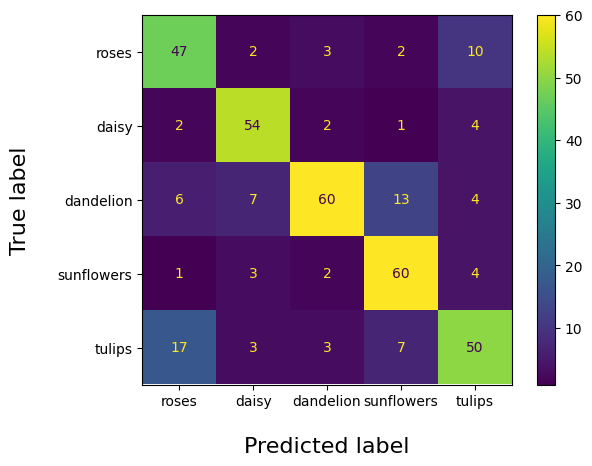

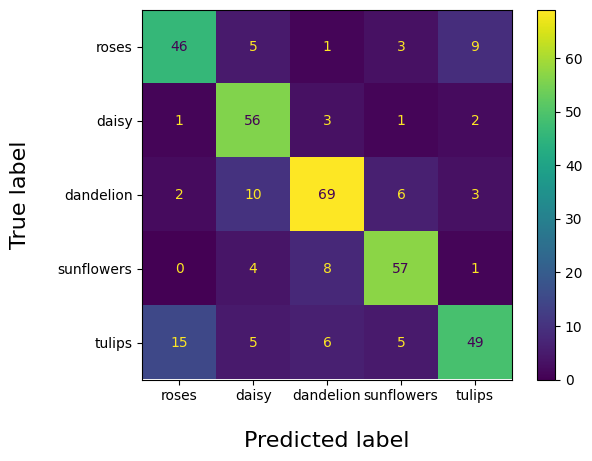

In [37]:
cm_2 = confusion_matrix(Y_test, Yp2_test)
display_cm2 = ConfusionMatrixDisplay(cm_2, display_labels=list(labels.keys()))

display_cm2.plot()
plt.xlabel('Predicted label', fontsize=16, labelpad=20)
plt.ylabel('True label', fontsize=16, labelpad=20)

display_cm1.plot()
plt.xlabel('Predicted label', fontsize=16, labelpad=20)
plt.ylabel('True label', fontsize=16, labelpad=20)

In [38]:
cr_2 = classification_report(Y_test, Yp2_test)
print(cr_2)
print('-'*100)
print(cr_1)

              precision    recall  f1-score   support

           0       0.64      0.73      0.69        64
           1       0.78      0.86      0.82        63
           2       0.86      0.67      0.75        90
           3       0.72      0.86      0.78        70
           4       0.69      0.62      0.66        80

    accuracy                           0.74       367
   macro avg       0.74      0.75      0.74       367
weighted avg       0.75      0.74      0.74       367

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        64
           1       0.70      0.89      0.78        63
           2       0.79      0.77      0.78        90
           3       0.79      0.81      0.80        70
           4       0.77      0.61      0.68        80

    accuracy                           0.75       367
   macro avg       0.75      0